In [259]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [260]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

 #foundational package for scientific computing
    
import numpy                 as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas                as pd


#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot     as plt

#Visualization
import seaborn               as sns

#collection of functions for scientific computing and advance mathematics
import scipy                 as sp

#collection of machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import LogisticRegression

from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix


#Common Model Helpers
from sklearn.preprocessing  import LabelEncoder
from sklearn                import metrics
from sklearn                import model_selection
import pylab                as pl

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [261]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.

In [262]:
leads_data = leads_data.replace('Select', np.nan)

In [263]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

So, we will directly drop such columns which have more than 40% of null values.

In [264]:
Drop_Columns=['How did you hear about X Education','Lead Quality', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index','Asymmetrique Activity Index',
             'Asymmetrique Profile Score','Lead Profile']

leads_data.drop(Drop_Columns, axis=1, inplace=True)


In [265]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))
leads_data.shape

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

(9240, 30)

In [266]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Netherlands                2
Uganda                     2
Philippines                2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
China                      2
Ghana                      2
Russia                     1
Sri Lanka                  1
Kenya                      1
Indonesia                  1
Tanzania                   1
Liberia                    1
Denmark       

Let's fill the missing values in the country column by mode.

In [267]:
leads_data['Country'].fillna(leads_data['Country'].mode()[0],inplace=True)

In [268]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Since the output for above piece of code tells us the percentage of missing values 
in the columns TotalVisits, Page Views Per Visit, Lead Source and Last Activity have very less percent of null values.
As these percentages are negligible so we can remove the rows where these columns have null values

In [269]:
index_to_drop = leads_data.index[leads_data['Lead Source'].isnull()]
leads_data = leads_data.drop(index_to_drop)

In [270]:
index_to_drop = leads_data.index[leads_data['TotalVisits'].isnull()]
leads_data = leads_data.drop(index_to_drop)        

In [271]:
index_to_drop = leads_data.index[leads_data['Page Views Per Visit'].isnull()]
leads_data = leads_data.drop(index_to_drop)        

In [272]:
index_to_drop = leads_data.index[leads_data['Last Activity'].isnull()]
leads_data    = leads_data.drop(index_to_drop)        

In [273]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.0000

In [274]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [275]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   5792 

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64


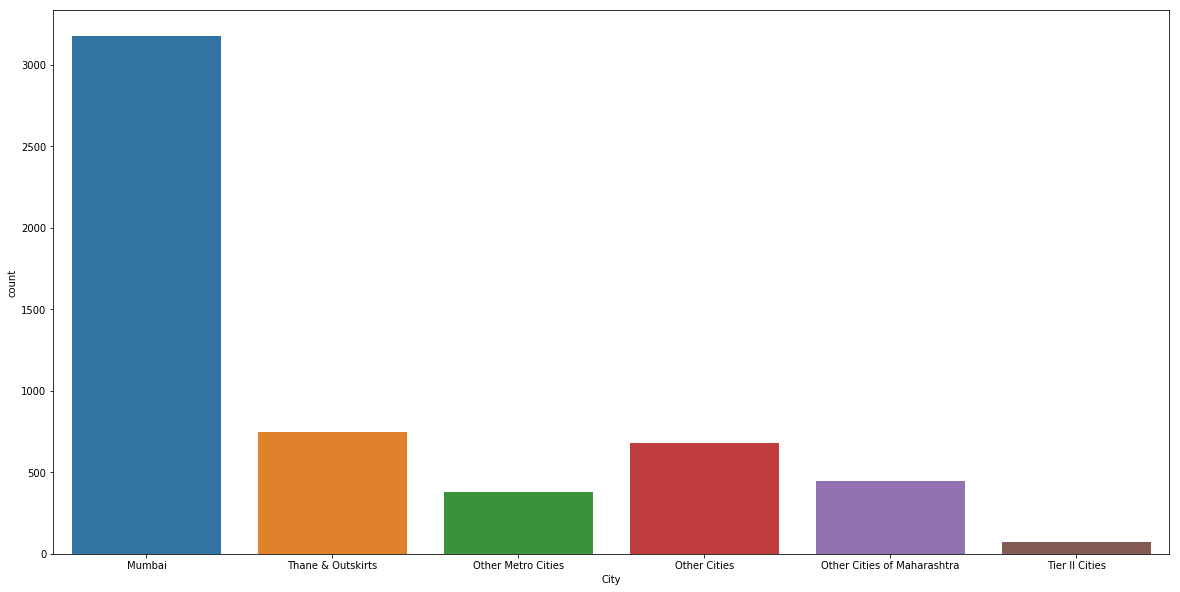

In [276]:
print(leads_data['City'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot(leads_data['City'])

Let's fill the missing values in the city column by mode.

In [277]:
leads_data['City'].fillna(leads_data['City'].mode()[0],inplace=True)

In [278]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.0000

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

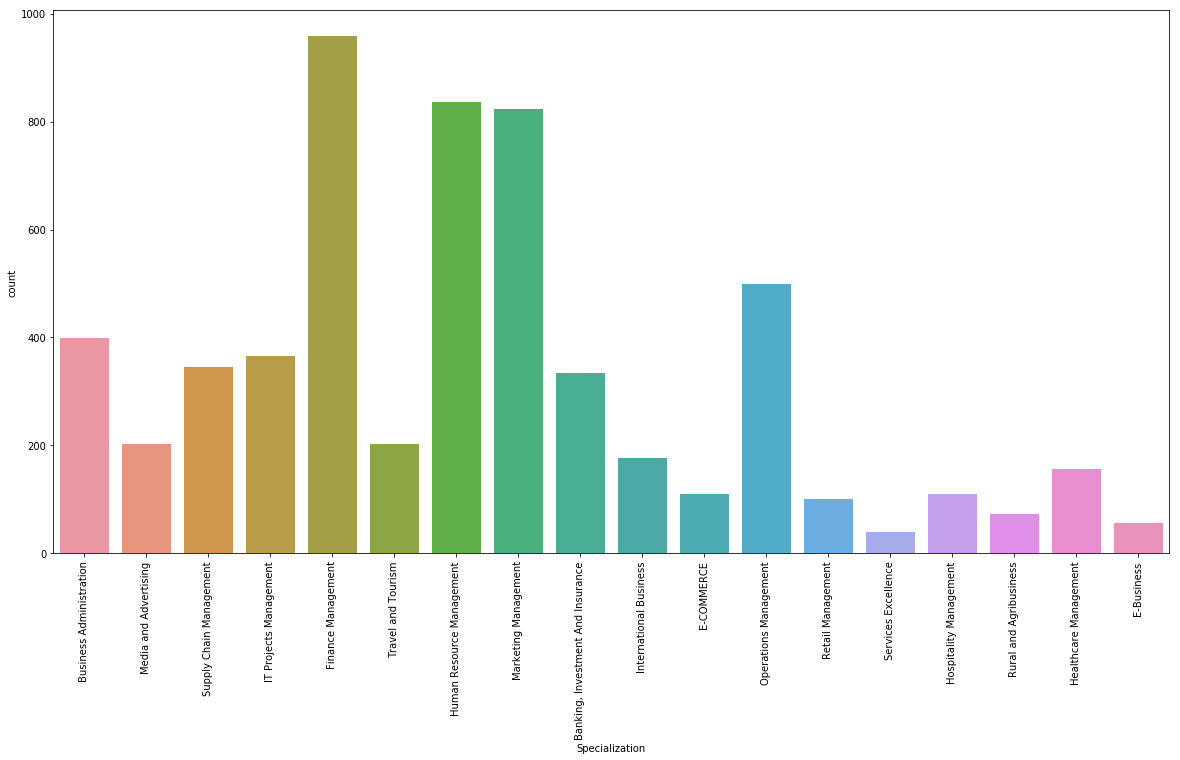

In [279]:
print(leads_data['Specialization'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation = 90)

As the output of the above graph does not show a big difference between top 3 heighted bars 
so it will be better if we impute the null values in this column as 'others'. 

In [280]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Others')

In [281]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.0000

In [282]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

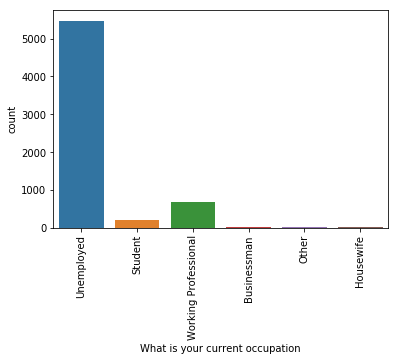

In [283]:
sns.countplot(leads_data['What is your current occupation'])
plt.xticks(rotation=90)

Let's fill the missing values in the 'What is your current occupation' column by mode.

In [284]:
leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0],inplace=True)

In [285]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Magazine                                          0.0000

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

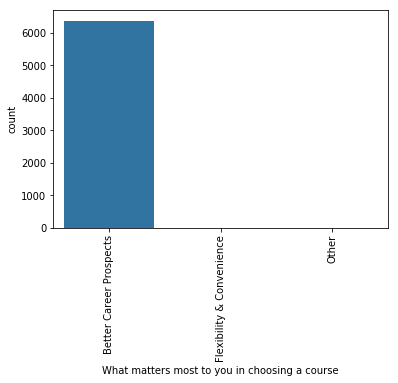

In [286]:
print(leads_data['What matters most to you in choosing a course'].value_counts())
sns.countplot(leads_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

Let's fill the missing values in the 'What matters most to you in choosing a course' column by mode.

In [287]:
leads_data['What matters most to you in choosing a course'].fillna(leads_data['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [288]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [289]:
leads_data['Tags'].value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

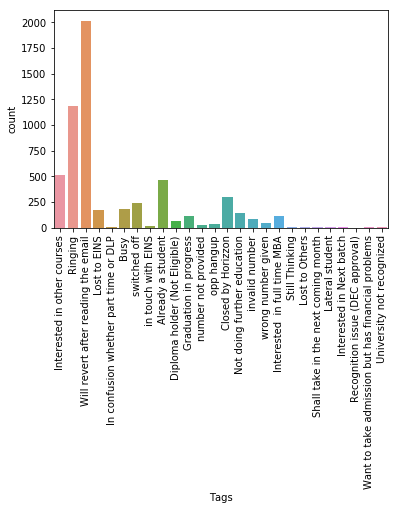

In [290]:
print(leads_data['Tags'].value_counts())
sns.countplot(leads_data['Tags'])
plt.xticks(rotation=90)

Let's fill the missing values in the 'Tags' column by mode.

In [291]:
leads_data['Tags'].fillna(leads_data['Tags'].mode()[0],inplace=True)

In [292]:
print(100*(leads_data.isnull().sum()/len(leads_data.index)))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Based on the output, our data does not have any missing value now so, we can proceed further.

### Now let's do some univariate analysis with some variables

### Lead Original

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

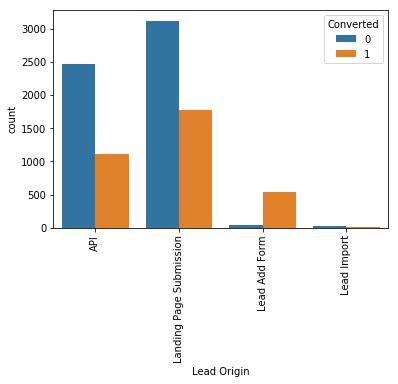

In [293]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Inference:-
API has around 40% and Landing Page Submission has around 50% conversion rate and also count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

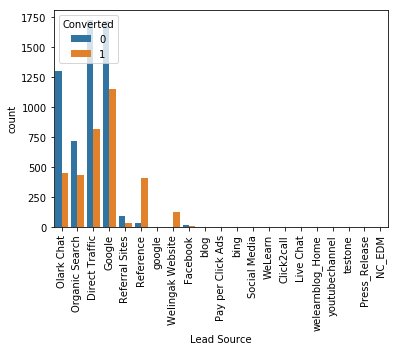

In [294]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

In [295]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

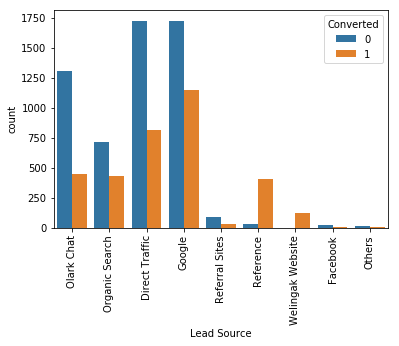

In [296]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

### Inference:-
Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [297]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Do Not Email & Do Not Call

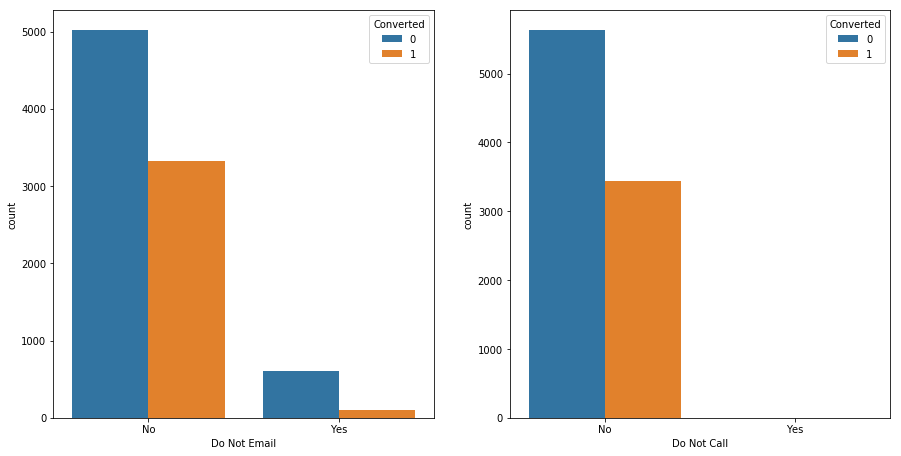

In [298]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x=leads_data['Do Not Email'], hue='Converted', data=leads_data, ax=axs[0])
sns.countplot(x=leads_data['Do Not Call'],  hue='Converted', data=leads_data, ax=axs[1])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

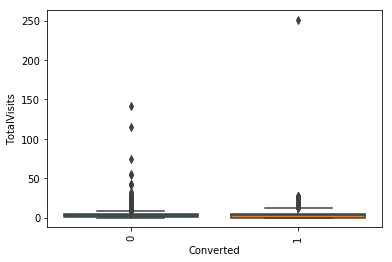

In [299]:
sns.boxplot(y = "TotalVisits", x= "Converted", data = leads_data)
plt.xticks(rotation = 90)

As we can see there are a number of outliers in the data.
We will cap the outliers to 95% value for analysis.

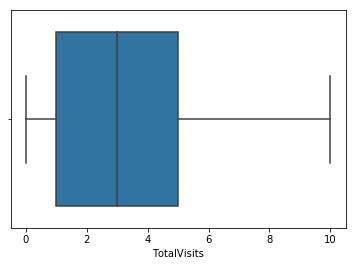

In [300]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]
sns.boxplot(leads_data['TotalVisits'])


(array([0, 1]), <a list of 2 Text xticklabel objects>)

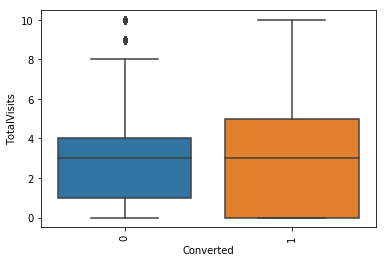

In [301]:
sns.boxplot(y = "TotalVisits", x= "Converted", data = leads_data)
plt.xticks(rotation = 90)

# Inference:-
Median for converted and not converted leads are the same.
So, nothng conclusive can be said on the basis of Total Visits.

# Total time spent on website

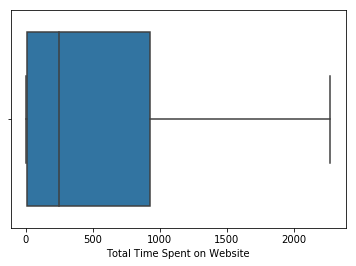

In [302]:
sns.boxplot(leads_data['Total Time Spent on Website'])

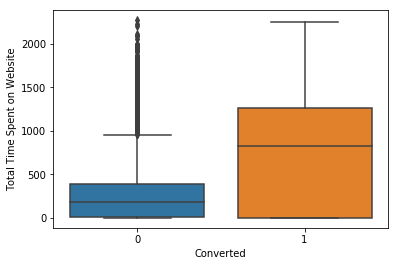

In [303]:
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads_data)

# Inference:
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

## Page Views Per Visit

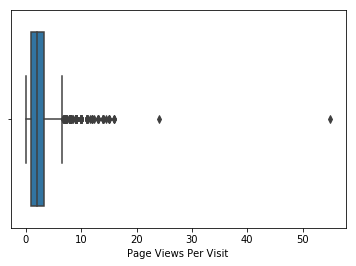

In [304]:
sns.boxplot(leads_data['Page Views Per Visit'])

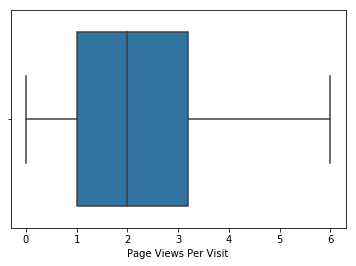

In [305]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(leads_data['Page Views Per Visit'])

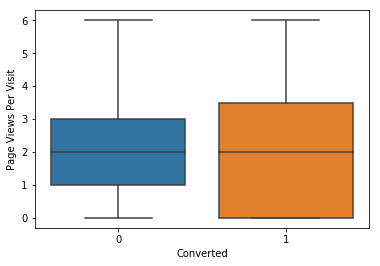

In [306]:
sns.boxplot(y='Page Views Per Visit',x='Converted', data=leads_data)

## Inference
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

## Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

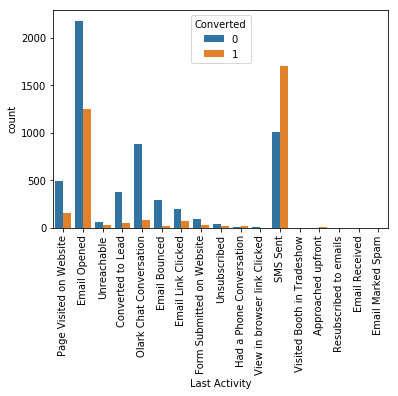

In [307]:
sns.countplot('Last Activity', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

In [308]:
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

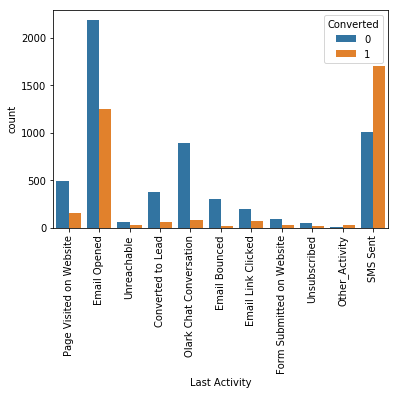

In [309]:
sns.countplot('Last Activity', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference:-
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.b

## Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

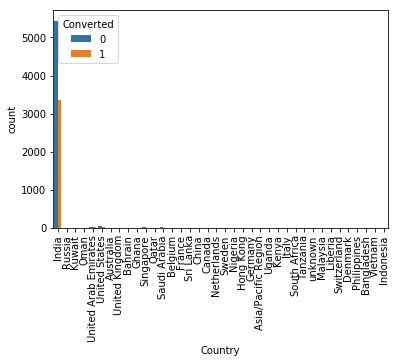

In [310]:
sns.countplot('Country', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference:-
Most values are 'India' no such inference can be drawn.

## Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

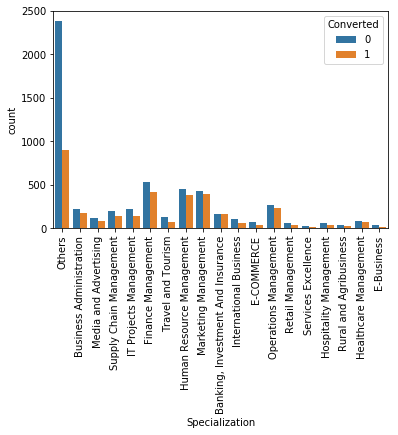

In [311]:
sns.countplot('Specialization',hue='Converted', data=leads_data)
plt.xticks(rotation=90)

In [312]:
leads_data['Specialization'] = leads_data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

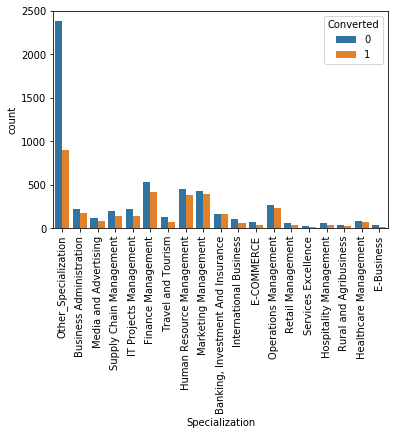

In [313]:
sns.countplot('Specialization',hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference:-

As the above graph tells conversion rate for Finance Management, Human Resource Management, Marketing Management is good but we need to increase the number of leads to have much better conversion rates.
Though the Other_Specialization has the highest conversion rate for this column but we cannot consider it for now as we don't have much information about it.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

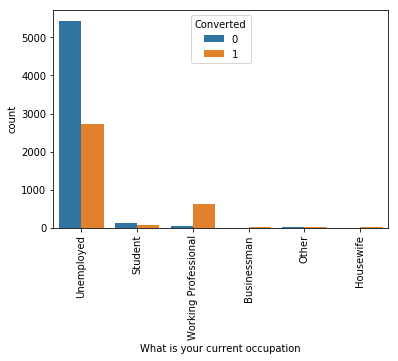

In [314]:
sns.countplot('What is your current occupation', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference:-
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

## What matters most to you in choosing a course

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

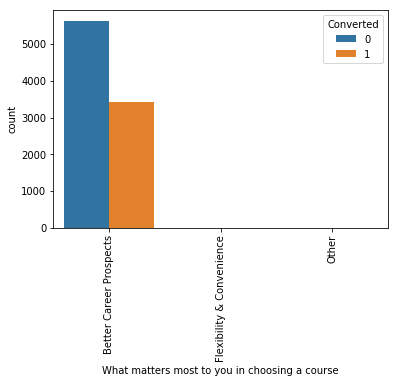

In [315]:
sns.countplot('What matters most to you in choosing a course', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference:-
Most values are 'Better Career Prospects' no such inference can be drawn.

## Search

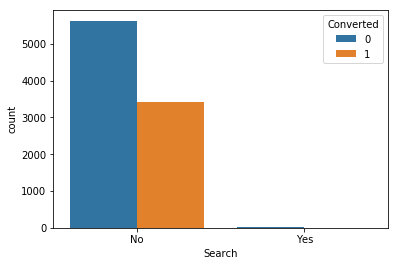

In [316]:
sns.countplot('Search', hue='Converted', data=leads_data)

## Inference:-
Most values are 'No' no such inference can be drawn.

In [317]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Magazine

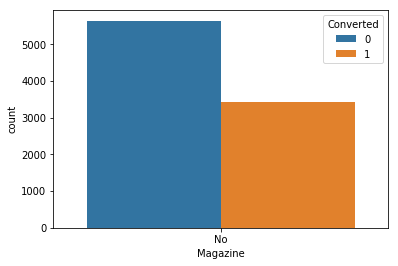

In [318]:
sns.countplot('Magazine', hue='Converted', data=leads_data)

## Inference:-
Most values are 'No' no such inference can be drawn.

## Newspaper Article

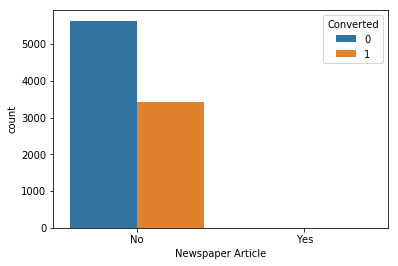

In [319]:
sns.countplot('Newspaper Article',hue='Converted', data=leads_data)

## Inference:-
Most values are 'No' no such inference can be drawn.

## X Education Forums

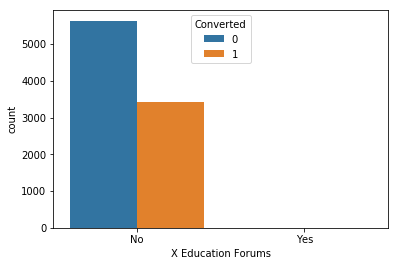

In [320]:
sns.countplot('X Education Forums',hue='Converted', data=leads_data)

## Inference:-
Most values are 'No' no such inference can be drawn.

In [321]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Newspaper

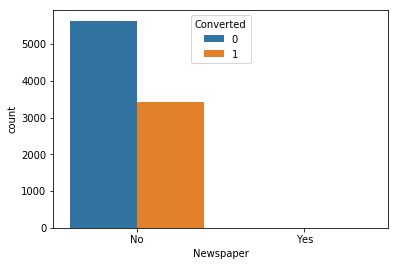

In [322]:
sns.countplot(leads_data['Newspaper'],hue='Converted', data=leads_data)

## Inference:-
Most values are 'No' no such inference can be drawn.

## Digital Advertisement

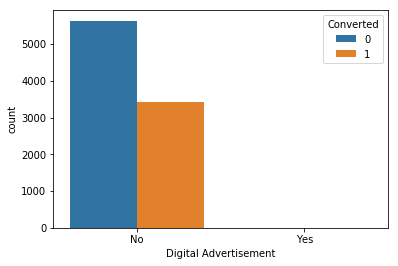

In [323]:
sns.countplot(leads_data['Digital Advertisement'],hue='Converted', data=leads_data)

## Inference
Most values are 'No' no such inference can be drawn.

## Through Recommendations

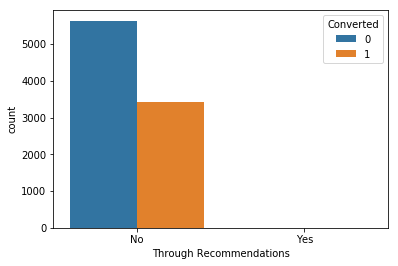

In [324]:
sns.countplot(leads_data['Through Recommendations'],hue='Converted', data=leads_data)

## Inference
Most values are 'No' no such inference can be drawn.

## Receive More Updates About Our Courses

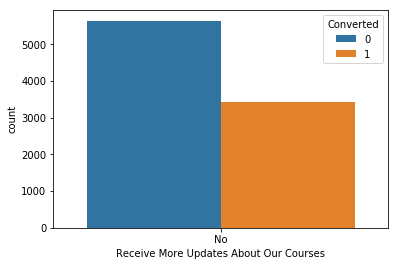

In [325]:
sns.countplot(leads_data['Receive More Updates About Our Courses'],hue='Converted', data=leads_data)

## Inference
Most values are 'No' no such inference can be drawn.

## Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

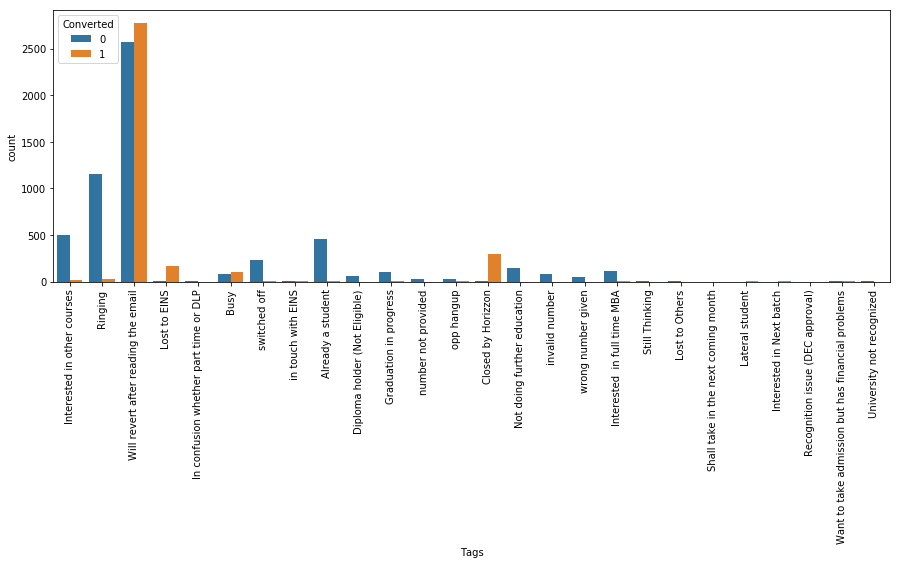

In [326]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(leads_data['Tags'],hue='Converted', data=leads_data)
plt.xticks(rotation=90)

In [327]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"

leads_data['Tags']=leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                              'wrong number given', 'Interested  in full time MBA', 'Closed by Horizzon', 'Lost to EINS'], 'Other_Tags')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

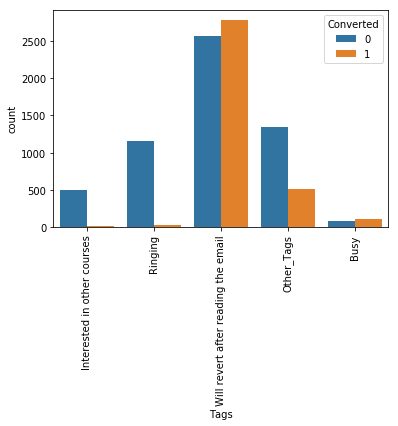

In [328]:
sns.countplot(leads_data['Tags'],hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference
'Will revert after reading the mail' has higher conversion rates so mainly need to send them mails so that they can revert after the mail.

## Update me on Supply Chain Content

(array([0]), <a list of 1 Text xticklabel objects>)

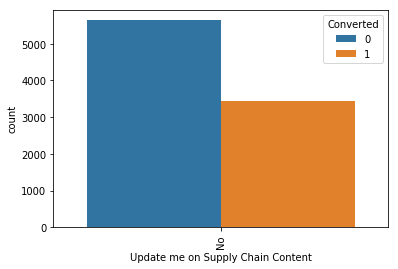

In [329]:
sns.countplot(leads_data['Update me on Supply Chain Content'],hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference
Most values are 'No' no such inference can be drawn.

## Get updates on DM Content

(array([0]), <a list of 1 Text xticklabel objects>)

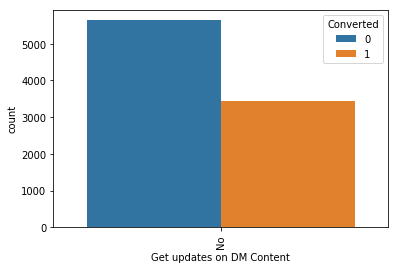

In [330]:
sns.countplot('Get updates on DM Content', hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference
Most values are 'No' no such inference can be drawn.

## I agree to pay the amount through cheque


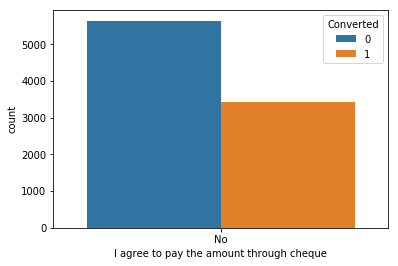

In [331]:
sns.countplot(leads_data['I agree to pay the amount through cheque'], hue='Converted', data=leads_data)

## Inference
Most values are 'No' no such inference can be drawn.

## City

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

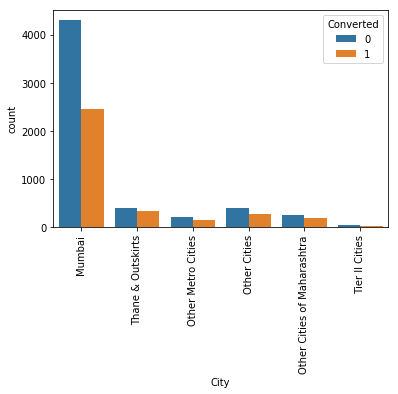

In [332]:
sns.countplot(leads_data['City'], hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference
Most leads are from mumbai with around 30% conversion rate.

## A free copy of Mastering The Interview

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

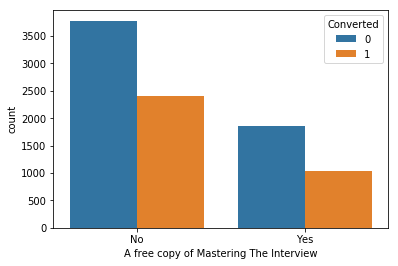

In [333]:
sns.countplot(leads_data['A free copy of Mastering The Interview'], hue='Converted', data=leads_data)
leads_data['A free copy of Mastering The Interview'].describe()

## Inference
Conversion rate for both 'Yes' and 'No' is around 35%.

## Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

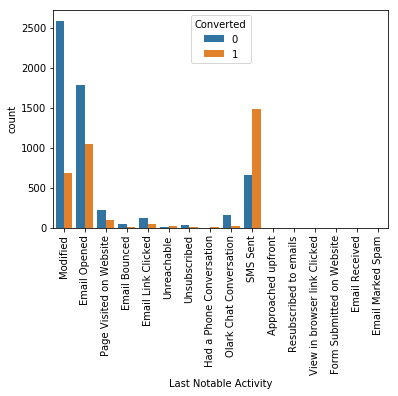

In [334]:
sns.countplot(leads_data['Last Notable Activity'], hue='Converted', data=leads_data)
plt.xticks(rotation=90)

In [335]:
leads_data['Last Notable Activity']=leads_data['Last Notable Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation'
                                                                                ,'Email Bounced','Approached upfront','Resubscribed to emails',
                                                                                 'View in browser link Clicked','Form Submitted on Website',
                                                                                 'Email Received','Email Marked Spam'], 'other_last_notable_ativity')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

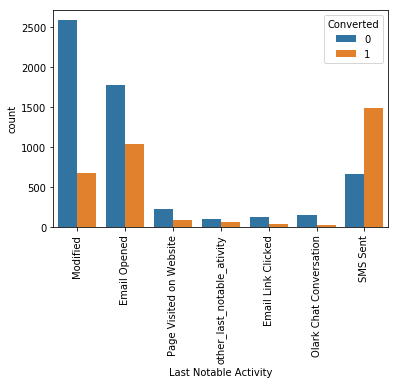

In [336]:
sns.countplot(leads_data['Last Notable Activity'], hue='Converted', data=leads_data)
plt.xticks(rotation=90)

## Inference
SMS sent has the highest conversion rate.
Also, there are so many leads which have their last notable activity as 'Modified' and 'Email Opened' but there conversion rate is low.

## Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model and no such inferences can be drawn from them, hence we can drop them for further analysis

In [337]:
leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'], axis=1)

In [338]:
leads_data.shape

(9074, 15)

In [339]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


Now let's convert binary variables 'Do Not Email' and 'Do Not Call' (Yes/No) to 1/0

In [340]:
varlist=['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

leads_data[varlist] = leads_data[varlist].apply(binary_map)


In [341]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


## Dummy Variables

Now let's convert categorical variables into numeric ones by creating dummy variables for them.

In [342]:
dummy1=pd.get_dummies(leads_data[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']], drop_first=True)

In [343]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [344]:
leads_data=pd.concat([leads_data, dummy1], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,0,0,0


Now let's drop all the cateogorical variables for which we have created dummy variables

In [345]:
drop_list=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']
leads_data.drop(drop_list,axis=1, inplace=True)

In [346]:
leads_data.shape

(9074, 66)

In [347]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Splitting the dataset
Let's split the data in train and test datasets.

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
X=leads_data.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [350]:
y=leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [352]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [353]:
#Convert numpy array X_train to dataframe
X_train.shape

(6351, 64)

In [354]:
Conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Conversion

37.85541106458012

## Model Building

Running First Training Model

In [355]:
import statsmodels.api as sm

In [356]:
# Logistic Regression Model

log1=sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.7
Date:                Wed, 09 Oct 2019   Deviance:                       4045.4
Time:                        04:04:47   Pearson chi2:                 8.89e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1918      1.511     -0.127      0.899      -3.154       2.770
Do Not Email                                            -1.7676      0.257     -6.891      0.000      -2.270      -1.265
Do Not Call                                             21.1691   2.92e+04      0.001      0.999   -5.72e+04    5.72e+04
TotalVisits                                              0.3199      0.064      4.974      0.000       0.194       0.446
Total Time Spent on Website                              1.1666      0.049     24.051      0.000       1.072       1.262
Page Views Per Visit                                    -0.3261      0.072     -4.512      0.000      -0.468      -0.184
Lead Origin_Landing Page Submission                     -0.9544      0.160     -5.967      0.000      -1.268      -0.641
Lead Origin_Lead Add Form                                0.9240      1.057      0.874      0.382      -1.148       2.996
Lead Origin_Lead Import                                 23.6981   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -22.1855   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.2322      0.112      2.065      0.039       0.012       0.453
Lead Source_Olark Chat                                   1.0629      0.184      5.770      0.000       0.702       1.424
Lead Source_Organic Search                               0.1910      0.154      1.243      0.214      -0.110       0.492
Lead Source_Others                                       0.3188      0.711      0.449      0.654      -1.074       1.711
Lead Source_Reference                                    3.2545      1.096      2.970      0.003       1.107       5.402
Lead Source_Referral Sites                              -0.1274      0.396     -0.322      0.748      -0.903       0.648
Lead Source_Welingak Website                             5.0020      1.292      3.872      0.000       2.470       7.534
Last Activity_Email Bounced                              0.0798      0.559      0.143      0.887      -1.016       1.176
Last Activity_Email Link Clicked                         0.9335      0.458      2.036      0.042       0.035       1.832
Last Activity_Email Opened                               1.0159      0.272      3.740      0.000       0.484       1.548
Last Activity_Form Submitted on Website                  0.1861      0.429      0.433      0.665      -0.655       1.027
Last Activity_Olark Chat Conversation                   -0.3876      0.302     -1.283      0.199      -0.980       0.204
Last Activity_Other_Activity                             2.6904      0.646      4.167      0.000       1.425       3.956
Last Activity_Pa

## Feature Selection Using RFE


In [357]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

In [358]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)

In [359]:
rfe = rfe.fit(X_train, y_train)

In [360]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [361]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 6),
 ('Last Activity_SMS Sent', False, 2

In [362]:
##Let's store columns (features) selected by RFE in the 'col' list:-
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Specialization_Other_Specialization',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_last_notable_ativity'],
      dtype='object')

In [363]:
## Columns excluded by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing

# Let's build our model again using RFE selected variables

In [364]:
X_train_sm = sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2111.7
Date:                Wed, 09 Oct 2019   Deviance:                       4223.3
Time:                        04:04:51   Pearson chi2:                 8.31e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8326      0.158     -5.283      0.000      -1.141      -0.524
Do Not Email                                            -1.8416      0.211     -8.737      0.000      -2.255      -1.428
Total Time Spent on Website                              1.0592      0.043     24.703      0.000       0.975       1.143
Lead Origin_Landing Page Submission                     -1.3873      0.140     -9.894      0.000      -1.662      -1.112
Lead Origin_Lead Add Form                                0.8662      0.878      0.987      0.324      -0.854       2.586
Lead Source_Reference                                    2.8257      0.919      3.075      0.002       1.025       4.627
Lead Source_Welingak Website                             4.6165      1.145      4.034      0.000       2.373       6.860
Last Activity_Email Opened                               0.6769      0.091      7.408      0.000       0.498       0.856
Last Activity_Other_Activity                             2.1181      0.605      3.501      0.000       0.932       3.304
Specialization_Other_Specialization                     -1.3359      0.143     -9.366      0.000      -1.615      -1.056
What is your current occupation_Working Professional     2.4835      0.229     10.848      0.000       2.035       2.932
Tags_Interested in other courses                        -2.6103      0.360     -7.259      0.000      -3.315      -1.906
Tags_Ringing                                            -3.8769      0.268    -14.483      0.000      -4.402      -3.352
Tags_Will revert after reading the email                 1.0209      0.093     10.985      0.000       0.839       1.203
Last Notable Activity_SMS Sent                           2.6515      0.114     23.262      0.000       2.428       2.875
Last Notable Activity_other_last_notable_ativity         1.5536      0.316      4.911      0.000       0.934       2.174
========================================================================================================================
"""

Above, summary for the model shows variable 'Lead Origin_Lead Add Form' is insignificant as it has higher P-value (0.324). So, let's drop this variable.

In [365]:
col1=col.drop('Lead Origin_Lead Add Form',1)
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Specialization_Other_Specialization',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other_last_notable_ativity'],
      dtype='object')

## Now let's create the model again

In [366]:
X_train_sm=sm.add_constant(X_train[col1])
logm3=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2112.2
Date:                Wed, 09 Oct 2019   Deviance:                       4224.4
Time:                        04:04:51   Pearson chi2:                 8.32e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8194      0.157     -5.216      0.000      -1.127      -0.511
Do Not Email                                            -1.8427      0.211     -8.741      0.000      -2.256      -1.430
Total Time Spent on Website                              1.0591      0.043     24.699      0.000       0.975       1.143
Lead Origin_Landing Page Submission                     -1.4000      0.140    -10.014      0.000      -1.674      -1.126
Lead Source_Reference                                    3.6851      0.292     12.619      0.000       3.113       4.258
Lead Source_Welingak Website                             5.4796      0.738      7.424      0.000       4.033       6.926
Last Activity_Email Opened                               0.6772      0.091      7.414      0.000       0.498       0.856
Last Activity_Other_Activity                             2.1169      0.605      3.501      0.000       0.932       3.302
Specialization_Other_Specialization                     -1.3459      0.142     -9.454      0.000      -1.625      -1.067
What is your current occupation_Working Professional     2.4818      0.229     10.835      0.000       2.033       2.931
Tags_Interested in other courses                        -2.6160      0.360     -7.274      0.000      -3.321      -1.911
Tags_Ringing                                            -3.8792      0.268    -14.493      0.000      -4.404      -3.355
Tags_Will revert after reading the email                 1.0200      0.093     10.978      0.000       0.838       1.202
Last Notable Activity_SMS Sent                           2.6531      0.114     23.280      0.000       2.430       2.877
Last Notable Activity_other_last_notable_ativity         1.5529      0.316      4.908      0.000       0.933       2.173
========================================================================================================================
"""

In [367]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.333616
1012    0.283887
9226    0.000924
4750    0.960614
7987    0.479377
1281    0.918689
2880    0.189150
4971    0.979166
7536    0.915312
1248    0.015815
dtype: float64

In [368]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.33616129e-01, 2.83887360e-01, 9.24177177e-04, 9.60614207e-01,
       4.79376835e-01, 9.18689260e-01, 1.89149926e-01, 9.79166066e-01,
       9.15311691e-01, 1.58152909e-02])

In [369]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.333616,3009
1,0,0.283887,1012
2,0,0.000924,9226
3,1,0.960614,4750
4,1,0.479377,7987


In [370]:
##Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

y_train_pred_final['predicted']=y_train_pred_final['Converted_prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,predicted
0,0,0.333616,3009,0
1,0,0.283887,1012,0
2,0,0.000924,9226,0
3,1,0.960614,4750,1
4,1,0.479377,7987,0


## Let's see confusion matrix

In [371]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3560  345]
 [ 509 1937]]


In [372]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.865532986931192


## Accuracy of model is around 86.5%.

## Check VIF values
Now we will check the VIF values of all the variables which have used in our final model (logm3) so far. 

In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [374]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,3.18
2,Lead Origin_Landing Page Submission,2.77
7,Specialization_Other_Specialization,2.26
5,Last Activity_Email Opened,1.99
12,Last Notable Activity_SMS Sent,1.85
10,Tags_Ringing,1.56
0,Do Not Email,1.28
3,Lead Source_Reference,1.25
8,What is your current occupation_Working Profes...,1.23
13,Last Notable Activity_other_last_notable_ativity,1.23


## Metrics beyond simply accuracy

In [375]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [376]:
TP / float(TP+FN)


0.7919051512673753

In [377]:
TN / float(TN+FP)

0.911651728553137

In [378]:
print(FP/ float(TN+FP))


0.088348271446863


In [379]:
print (TP / float(TP+FP))


0.8488168273444348


In [380]:
print (TN / float(TN+ FN))


0.8749078397640698


## Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [381]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [382]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

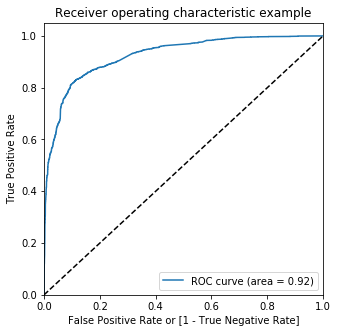

In [383]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [384]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.333616,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.283887,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.000924,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.960614,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.479377,7987,0,1,1,1,1,1,0,0,0,0,0


In [385]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.660368  0.972608  0.464789
0.2   0.2  0.800819  0.902698  0.737004
0.3   0.3  0.843017  0.867130  0.827913
0.4   0.4  0.860652  0.834015  0.877337
0.5   0.5  0.865533  0.791905  0.911652
0.6   0.6  0.859865  0.739984  0.934955
0.7   0.7  0.829948  0.626738  0.957234
0.8   0.8  0.810738  0.542518  0.978745
0.9   0.9  0.779405  0.442355  0.990525


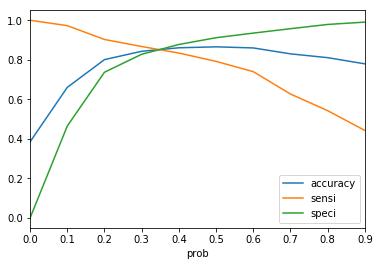

In [386]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [387]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.333616,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.283887,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.000924,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.960614,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.479377,7987,0,1,1,1,1,1,0,0,0,0,0,1


## Assign lead score to every lead

In [388]:
y_train_pred_final['Lead_Score']=y_train_pred_final['Converted_prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.333616,3009,0,1,1,1,1,0,0,0,0,0,0,0,33
1,0,0.283887,1012,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.000924,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.960614,4750,1,1,1,1,1,1,1,1,1,1,1,1,96
4,1,0.479377,7987,0,1,1,1,1,1,0,0,0,0,0,1,48


In [389]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8479149632052331

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.8568501920614596

In [392]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14314980793854035


In [393]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7876946448917584


In [394]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8999462076385153


# Precision and Recall

In [395]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion


array([[3560,  345],
       [ 509, 1937]], dtype=int64)

In [396]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8488168273444348

In [397]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7919051512673753

In [398]:
#Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)



0.8488168273444348

In [399]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.7919051512673753

## Precision and recall tradeoff

In [400]:
from sklearn.metrics import precision_recall_curve

In [401]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

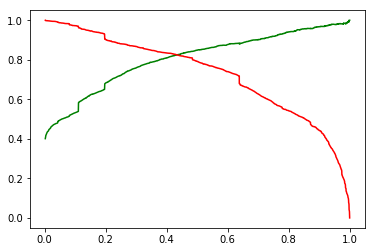

In [402]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [403]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [404]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Specialization_Other_Specialization,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent,Last Notable Activity_other_last_notable_ativity
3271,0,-0.600595,0,0,0,1,0,1,0,0,0,1,0,0
1490,0,1.887326,1,0,0,1,0,0,1,0,0,1,0,0
7936,0,-0.752879,0,0,0,1,0,1,0,0,0,1,0,0
4216,0,-0.888650,0,1,0,1,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,1,0,0,0,0,0,1,0,0


In [405]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [406]:
y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]


3271    0.248964
1490    0.981266
7936    0.220040
4216    0.930979
3830    0.241470
1800    0.762450
6507    0.015736
4821    0.239022
4223    0.985961
4714    0.110419
dtype: float64

In [407]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
3271,0.248964
1490,0.981266
7936,0.220040
4216,0.930979
3830,0.241470


In [408]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [409]:
y_test_df['Prospect ID'] = y_test_df.index
y_test_df

,Converted,Prospect ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830
1800,1,1800
6507,0,6507
4821,0,4821
4223,1,4223
4714,0,4714


In [410]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [411]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [412]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.248964
1,1,1490,0.981266
2,0,7936,0.220040
3,1,4216,0.930979
4,0,3830,0.241470


In [413]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [414]:
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)


In [415]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.248964
1,1490,1,0.981266
2,7936,0,0.220040
3,4216,1,0.930979
4,3830,0,0.241470


In [416]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [417]:
y_pred_final

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.248964,0
1,1490,1,0.981266,1
2,7936,0,0.220040,0
3,4216,1,0.930979,1
4,3830,0,0.241470,0
5,1800,1,0.762450,1
6,6507,0,0.015736,0
7,4821,0,0.239022,0
8,4223,1,0.985961,1
9,4714,0,0.110419,0


In [418]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8490635328681602

In [420]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1492,  242],
       [ 169,  820]], dtype=int64)

In [421]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [422]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291203235591507

In [423]:
# Let us calculate specificity
TN / float(TN+FP)


0.8604382929642446

In [424]:
y_train_pred_final_TOP=y_train_pred_final.head(100).sort_values(by='Lead_Score', ascending=False) 

In [425]:
y_train_pred_final_TOP.final_predicted.mean()

0.45